<a href="https://colab.research.google.com/github/umakantiiit/umakantiiit/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
X = df.drop(columns=['Outcome'])
y=df['Outcome'].values


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(y.shape)

(768,)


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=0)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)



X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 1.17326939  1.26949628  1.80646526 ...  0.6018022  -0.94948585
   0.75445489]
 [ 0.30034921  1.23889536  0.32831385 ...  1.62731367 -0.42910648
  -0.61348145]
 [ 0.30034921 -0.81136647  0.22977042 ... -0.48701244 -0.83648918
  -0.18600135]
 ...
 [ 0.00937581 -0.96437108 -0.213675   ... -1.03141976 -1.00003698
  -1.12645758]
 [ 2.04618958 -1.23977939  0.22977042 ... -0.34774545 -0.54805033
   0.07048672]
 [ 0.30034921  0.32086768  0.62394413 ... -4.1585967   0.46297244
   2.97735146]]


In [ ]:
import tensorflow
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.initializers import HeNormal
tf.random.set_seed(3)

In [ ]:
model = Sequential([

    Dense(150,activation='relu',name='a1',input_shape=(X_train.shape[1],)),
    Dense(100,activation='relu',name='a2',kernel_initializer='he_normal'),
    Dense(50,activation='relu',name='a3',kernel_initializer='he_normal'),
    Dense(25,activation='relu',name='a4',kernel_initializer='he_normal'),
    Dense(1,activation='sigmoid',name='a5',kernel_initializer='he_normal')

]
)



In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a1 (Dense)                  (None, 150)               1350      
                                                                 
 a2 (Dense)                  (None, 100)               15100     
                                                                 
 a3 (Dense)                  (None, 50)                5050      
                                                                 
 a4 (Dense)                  (None, 25)                1275      
                                                                 
 a5 (Dense)                  (None, 1)                 26        
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history=model.fit(X_train, y_train,
          epochs=70,
          batch_size=32,callbacks=callback,validation_split=0.2
         )

Epoch 1/70
23/23 [==============================] - 1s 25ms/step - loss: 0.0309 - accuracy: 0.9875 - val_loss: 0.0465 - val_accuracy: 0.9778
Epoch 2/70
23/23 [==============================] - 0s 9ms/step - loss: 0.0302 - accuracy: 0.9875 - val_loss: 0.0377 - val_accuracy: 0.9833
Epoch 3/70
23/23 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9903 - val_loss: 0.0448 - val_accuracy: 0.9778
Epoch 4/70
23/23 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9889 - val_loss: 0.0605 - val_accuracy: 0.9667
Epoch 5/70
23/23 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9889 - val_loss: 0.0567 - val_accuracy: 0.9722
Epoch 5: early stopping


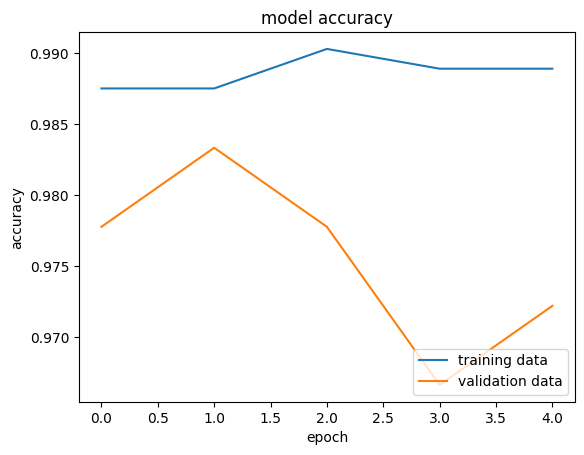

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

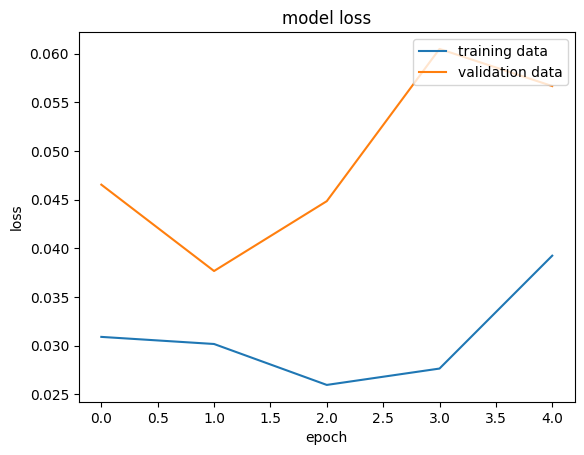

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 1.0731 - accuracy: 0.9200
0.9200000166893005


In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6716642e-13],
       [1.0765494e-15],
       [1.0000000e+00],
       [1.3475596e-35],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.8663236e-01],
       [3.8873201e-05],
       [7.2364867e-01],
       [9.9907643e-01],
       [5.3986657e-33],
       [7.8663236e-01],
       [3.9294389e-36],
       [9.9989986e-01],
       [1.0000000e+00],
       [9.9991971e-01],
       [6.0356765e-06],
       [1.0000000e+00],
       [2.1051123e-09],
       [1.3697132e-06],
       [6.0308160e-08],
       [9.9986261e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.3113285e-30],
       [1.0420000e-05],
       [4.6291898e-05],
       [1.0000000e+00],
       [7.1444994e-01],
       [9.9999851e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0023539e-20],
       [1.0000000e+00],
       [9.9995953e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.8663236e-01],
       [1.000000

In [ ]:
print(y_pred)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.6716642e-13]
 [1.0765494e-15]
 [1.0000000e+00]
 [1.3475596e-35]
 [1.0000000e+00]
 [1.0000000e+00]
 [7.8663236e-01]
 [3.8873201e-05]
 [7.2364867e-01]
 [9.9907643e-01]
 [5.3986657e-33]
 [7.8663236e-01]
 [3.9294389e-36]
 [9.9989986e-01]
 [1.0000000e+00]
 [9.9991971e-01]
 [6.0356765e-06]
 [1.0000000e+00]
 [2.1051123e-09]
 [1.3697132e-06]
 [6.0308160e-08]
 [9.9986261e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.3113285e-30]
 [1.0420000e-05]
 [4.6291898e-05]
 [1.0000000e+00]
 [7.1444994e-01]
 [9.9999851e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0023539e-20]
 [1.0000000e+00]
 [9.9995953e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [7.8663236e-01]
 [1.0000000e+00]
 [9.9899811e-01]
 [1.9737378e-02]
 [5.0740014e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.8970844e-04]
 [7.0497420e-31]
 [2.7312489e-11]
 [2.8919301e-11]
 [1.0000000e+00]
 [5.2864232e-07]
 [1.0443912e-30]
 [9.9964207e-01]
 [3.4997717e-21]
 [3.4777144e-01]
 [1.0000000e+00]
 [1.0000000e+0

In [ ]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]= 1
    else:
        y_pred[i]= 0

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Confusion Matrix:
[[48  6]
 [ 2 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.88      0.96      0.92        46

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



<Axes: >

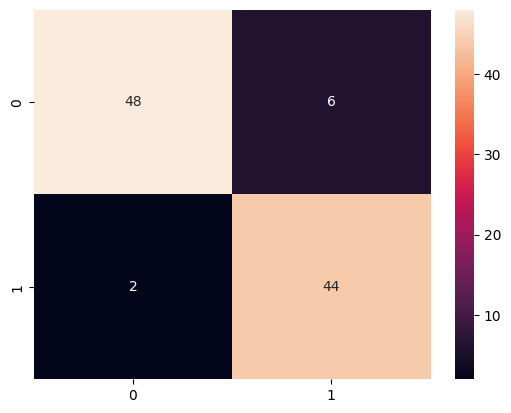

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)